In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Data Preprocessing

In [2]:
import pandas as pd
import random
import sys
import os
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
df_96 = pd.read_csv("MERGED1996_97_PP.csv")
df_97 = pd.read_csv("MERGED1997_98_PP.csv")
df_98 = pd.read_csv("MERGED1998_99_PP.csv")
df_99 = pd.read_csv("MERGED1999_00_PP.csv")
df_00 = pd.read_csv("MERGED2000_01_PP.csv")
df_01 = pd.read_csv("MERGED2001_02_PP.csv")
df_02 = pd.read_csv("MERGED2002_03_PP.csv")
df_03 = pd.read_csv("MERGED2003_04_PP.csv")
df_04 = pd.read_csv("MERGED2004_05_PP.csv")
df_05 = pd.read_csv("MERGED2005_06_PP.csv")
df_06 = pd.read_csv("MERGED2006_07_PP.csv")
df_07 = pd.read_csv("MERGED2007_08_PP.csv")
df_08 = pd.read_csv("MERGED2008_09_PP.csv")
df_09 = pd.read_csv("MERGED2009_10_PP.csv")
df_10 = pd.read_csv("MERGED2010_11_PP.csv")
df_11 = pd.read_csv("MERGED2011_12_PP.csv")
df_12 = pd.read_csv("MERGED2012_13_PP.csv")
df_13 = pd.read_csv("MERGED2013_14_PP.csv")
df_14 = pd.read_csv("MERGED2014_15_PP.csv")
df_15 = pd.read_csv("MERGED2015_16_PP.csv")
df_16 = pd.read_csv("MERGED2016_17_PP.csv")
df_17 = pd.read_csv("MERGED2017_18_PP.csv")

/home/lee_minji9521/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/lee_minji9521/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1806,1814) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/lee_minji9521/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,6,442,451,598,607,611,620,624,633,789,802,806,815,971,984,997,1153,1166,1407,1408,1411,1424,1425,1426,1431,1432,1433,1437,1438,1439,1440,1445,1446,1447,1451,1452,1453,1454,1459,1460,1461,1465,1466,1467,1468,1473,1474,1475,1479,1480,1481,1482,1487,1488,1489,1501,1502,1537,1538,1539,1540,1541,1542,1606,1609,1610,1611,1613,1614,1615,1616,1688,1689

In [6]:
frames = [df_96, df_97, df_98, df_99,
          df_00, df_01, df_02, df_03, 
          df_04, df_05, df_06, df_07,
          df_08, df_09, df_10, df_11, 
          df_12, df_13, df_14, df_15,
          df_16, df_17]

In [8]:
data = pd.concat(frames)

##### Look into the merged data

In [9]:
data.shape

(148286, 1977)

In [10]:
data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100636,01230800,12308,Community College of the Air Force,Montgomery,AL,36114-3011,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100654,00100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100663,00105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100672,00574900,5749,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100690,02503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop columns

In [4]:
# Remove unnecessary columns

"""
Manually selected columns:
8-digit OPE ID for institution, 6-digit OPE ID for institution, State postcode, 
ZIP code, URL for institution's homepage, URL for institution's net price calculator,
longitude, latitude, and INSTNM?

Full of null columns:
see the code below
"""

cols_to_remove=[
    #irrelevant data
    'OPEID',
    'OPEID6',
    'INSTNM',
    'ZIP',
    'INSTURL',
    'NPCURL',
    'LATITUDE',
    'LONGITUDE',
    
    #earnings data
    'COUNT_ED',
    'COUNT_NWNE_P10',
    'COUNT_WNE_P10',
    'MD_EARN_WNE_P10',
    'PCT10_EARN_WNE_P10',
    'PCT25_EARN_WNE_P10',
    'PCT75_EARN_WNE_P10',
    'PCT90_EARN_WNE_P10',
    'SD_EARN_WNE_P10',
    'COUNT_WNE_INC1_P10',
    'COUNT_WNE_INC2_P10',
    'COUNT_WNE_INC3_P10',
    'COUNT_WNE_INDEP0_INC1_P10',
    'COUNT_WNE_INDEP0_P10',
    'COUNT_WNE_INDEP1_P10',
    'COUNT_WNE_MALE0_P10',
    'COUNT_WNE_MALE1_P10',
    'GT_25K_P10',
    'GT_28K_P10',
    'MN_EARN_WNE_INC1_P10',
    'MN_EARN_WNE_INC2_P10',
    'MN_EARN_WNE_INC3_P10',
    'MN_EARN_WNE_INDEP0_INC1_P10',
    'MN_EARN_WNE_INDEP0_P10',
    'MN_EARN_WNE_INDEP1_P10',
    'MN_EARN_WNE_MALE0_P10',
    'MN_EARN_WNE_MALE1_P10',
    'COUNT_NWNE_P6',
    'COUNT_WNE_P6',
    'MN_EARN_WNE_P6',
    'MD_EARN_WNE_P6',
    'PCT10_EARN_WNE_P6',
    'PCT25_EARN_WNE_P6',
    'PCT75_EARN_WNE_P6',
    'PCT90_EARN_WNE_P6',
    'SD_EARN_WNE_P6',
    'COUNT_WNE_INC1_P6',
    'COUNT_WNE_INC2_P6',
    'COUNT_WNE_INC3_P6',
    'COUNT_WNE_INDEP0_INC1_P6',
    'COUNT_WNE_INDEP0_P6',
    'COUNT_WNE_INDEP1_P6',
    'COUNT_WNE_MALE0_P6',
    'COUNT_WNE_MALE1_P6',
    'GT_25K_P6',
    'GT_28K_P6',
    'MN_EARN_WNE_INC1_P6',
    'MN_EARN_WNE_INC2_P6',
    'MN_EARN_WNE_INC3_P6',
    'MN_EARN_WNE_INDEP0_INC1_P6',
    'MN_EARN_WNE_INDEP0_P6',
    'MN_EARN_WNE_INDEP1_P6',
    'MN_EARN_WNE_MALE0_P6',
    'MN_EARN_WNE_MALE1_P6',
    'COUNT_NWNE_P7',
    'COUNT_WNE_P7',
    'MN_EARN_WNE_P7',
    'SD_EARN_WNE_P7',
    'GT_25K_P7',
    'COUNT_NWNE_P8',
    'COUNT_WNE_P8',
    'MN_EARN_WNE_P8',
    'MD_EARN_WNE_P8',
    'PCT10_EARN_WNE_P8',
    'PCT25_EARN_WNE_P8',
    'PCT75_EARN_WNE_P8',
    'PCT90_EARN_WNE_P8',
    'SD_EARN_WNE_P8',
    'GT_25K_P8',
    'GT_28K_P8',
    'COUNT_NWNE_P9',
    'COUNT_WNE_P9',
    'MN_EARN_WNE_P9',
    'SD_EARN_WNE_P9',
    'GT_25K_P9'
]

In [6]:
df_12 = df_12.drop(columns=cols_to_remove)

In [7]:
df_12 = df_12.replace('PrivacySuppressed', np.nan)

In [8]:
df_12.shape

(7793, 1893)

In [9]:
df_12 = df_12.dropna(axis=1, how='all')
df_12 = df_12.dropna(axis=0, how='all')

In [10]:
df_12.shape

(7793, 1571)

## Exploring the data

In [12]:
df_12.groupby('STABBR').count()

,CITY,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,...,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6
STABBR,,,,,,,,,,,,,,,,,,,,,
AK,10,10,10,10,10,10,10,10,10,2,...,2,2,2,2,2,2,2,2,2,2
AL,95,95,95,95,95,95,95,95,95,34,...,7,4,4,0,13,9,7,4,4,0
AR,90,89,90,90,90,90,90,90,90,22,...,13,8,1,0,34,22,13,8,1,0
AS,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
AZ,136,134,136,136,136,136,136,136,136,22,...,31,23,16,16,62,46,31,23,16,16
CA,797,787,797,797,797,797,797,797,797,189,...,240,186,132,102,368,278,240,186,132,102
CO,136,135,136,136,136,136,136,136,136,33,...,25,20,12,10,50,29,25,20,12,10
CT,106,104,106,106,106,106,106,106,106,27,...,19,17,11,7,52,28,19,17,11,7
DC,25,22,25,25,25,25,25,25,25,9,...,3,3,2,1,3,3,3,3,2,1


In [11]:
# Only select states with >=100 respondents
df_12_group = df_12.groupby('STABBR').count()
states_100 = df_12_group[df_12_group['CITY'].values>=100].index

In [12]:
df_12 = df_12[df_12['STABBR'].isin(states_100)]

In [13]:
x = df_12[['STABBR','CITY']].groupby('STABBR').count().sort_values(by='CITY').index
y = df_12[['STABBR','CITY']].groupby('STABBR').count().sort_values(by='CITY').values

In [14]:
# Flatten y
y = [i[0] for i in y]

<BarContainer object of 28 artists>

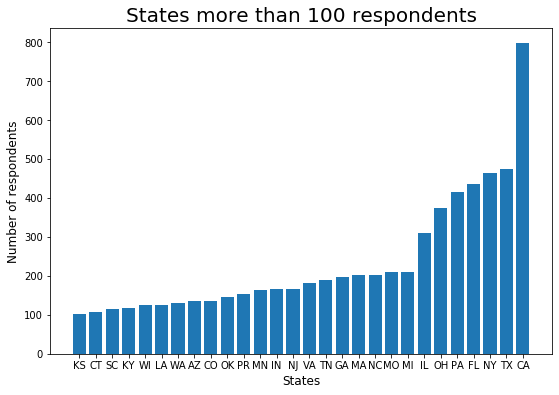

In [17]:
# Selected the states with
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.set_title('States more than 100 respondents', fontsize=20)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('Number of respondents', fontsize=12)
plt.bar(x=x, height=y)

#### Heatmaps to find correlation between features

In [15]:
Var_Corr = df_12.corr()

In [6]:
# sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

    Ok, that looks nasty.

In [35]:
#drop category columns from array if column was already eliminated from dataset
remaining = []

for i in cats:
    print(i)
    try:
        data[i].head(1)
        print("Keeping: " + str(i))
        #print()
        remaining.append(i)
    except:
        print("removing: " + str(i))
cats=remaining
cats

NameError: name 'cats' is not defined

#### One hot encoding

In [18]:
y = df_12['MN_EARN_WNE_P10']
y = y.astype('float64')
X = df_12.drop(columns=['MN_EARN_WNE_P10'])

In [30]:
data = enc.fit_transform(df_12['STABBR']).toarray()

ValueError: could not convert string to float: 'IL'

In [27]:

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_12[['STABBR']])

ValueError: could not convert string to float: 'IL'

In [28]:
X_hot = enc.transform(df_12[['STABBR']])
X_hot = pd.DataFrame(X_hot.todense())

ValueError: could not convert string to float: 'IL'

In [21]:
X = X.reset_index()

In [24]:
# enc.inverse_transform(X_hot.todense()[6556])


In [27]:
X_hot.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X.head()

,UNITID,CITY,STABBR,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6
0,101958,Elmhurst,IL,2.0,1,2,1,2,3,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102845,Vancouver,WA,1.0,1,1,1,3,3,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103644,Phoenix,AZ,2.0,1,2,2,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103723,Phoenix,AZ,3.0,0,4,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103732,Phoenix,AZ,1.0,1,2,1,1,3,4,...,NaN,NaN,NaN,NaN,12.0,5.0,NaN,NaN,NaN,NaN


In [25]:
X = pd.merge(X, X_hot, left_index = True, right_index = True )

NameError: name 'X_hot' is not defined

In [23]:
# This function make numerical values to folat type
# And drop other features with string values 
# Because I wanted to do one hot encoding only on STABBR to find the relationship b/t STABBR and student debt

for column in X.columns:
    
    try:
        X[column].astype(float)
    except ValueError as e:
        X = X.drop(column, axis = 1)

In [32]:
X.head()

,UNITID,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,...,18,19,20,21,22,23,24,25,26,27
0,101958,2.0,1,2,1,2,3,17,3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,102845,1.0,1,1,1,3,3,53,8,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,103644,2.0,1,2,2,3,3,4,6,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103723,3.0,0,4,3,3,3,4,6,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103732,1.0,1,2,1,1,3,4,6,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scaling

In [33]:
X_scaled = X.copy()
y_scaled = y.copy()

In [34]:
scaler = StandardScaler()
scaler.fit(X_scaled)
# scaler.fit(y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
y_scaled = np.array(y_scaled)
scaler.fit(y_scaled.reshape(1,-1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


StandardScaler(copy=True, with_mean=True, with_std=True)

#### PCA VIP Score to measure variable's importance

In [ ]:
X_scaled.fillna(X_scaled.mean())

In [41]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=10)
principalComponents_data = pca_data.fit_transform(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
X_scaled[~X_scaled['ADM_RATE'].isna()] # no nan values 1937

,UNITID,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,...,18,19,20,21,22,23,24,25,26,27
9,103893,1.0,1,6,1,3,3,4,6,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,103909,1.0,0,6,1,2,3,4,6,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,103927,1.0,0,6,1,2,3,4,6,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,104151,3.0,1,1,3,4,1,4,6,0.8891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,104179,3.0,1,1,3,4,1,4,6,0.7139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,479646,2.0,0,141,2,0,3,20,4,0.9053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6179,479655,2.0,0,141,2,0,3,17,3,0.8916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6180,479664,2.0,0,141,2,0,3,39,3,0.8224,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,479956,3.0,1,23,3,4,1,42,2,0.5734,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### train and test split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=list(X['STABBR']))

## Apply models

In [ ]:
#### Linear Regression